In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

http://koukyo1213.hatenablog.com/entry/KalmanFilter

In [2]:
import numpy as np
import numpy.random as random

In [3]:
def model(x, A, B, u):
    return np.dot(A, x) + B * u

def true(x):
    noise = random.normal(0.0, 1.0, (2, 1))    # 誤差を乗せて返す 
    return x + noise

def system(x, A, B, u):
    true_val = true(model(x, A, B, u))
    obs_val = true(true_val)
    return true_val, obs_val

In [4]:
def Kalman_Filter(m, V, y, A, B, u, Q, R):
    # 予測
    m_est = model(x, A, B, u)
    V_est = np.dot(np.dot(A, V), A.transpose()) + Q
    
    # 観測更新
    K = np.dot(V_est, np.linalg.inv(V_est + R))
    m_next = m_est + np.dot(K, (y - m_est))
    V_next = np.dot((np.identity(2) - K), V_est)

#     K = np.dot(V_est, np.dot(C.transpose(), np.linalg.inv(np.dot(C, np.dot(V_est, C.transpose())) + R)))
#     m_next = m_est + np.dot(K, (y - np.dot(C, m_est)))
#     V_next = np.dot((np.identity(2) - np.dot(K, C)), V_est)

    return m_next, V_next

In [5]:
A = np.identity(2) # 状態方程式のA
B = np.ones((2, 1)) # 状態方程式のB
u = 2.0 # 速度
x = np.zeros((2, 1)) # 真値
m = np.zeros((2, 1)) # 推定値
V = np.identity(2) # 推定値の初期共分散行列(勝手に設定して良い)
Q = 2 * np.identity(2) # 入力誤差の共分散行列(今回はtrue()の中でnoiseの分散を2.0に設定したので)
R = 2 * np.identity(2) # 上と同じ

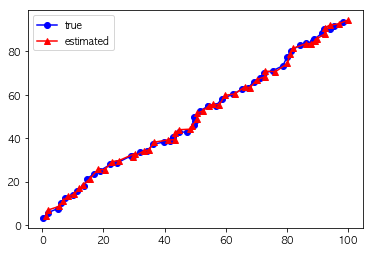

In [6]:
# 試行回数
NUM = 50

# 記録用
rec = np.empty((4, NUM))

# main loop
for i in range(NUM):
    x, y = system(x, A, B, u)
    m, V = Kalman_Filter(m, V, y, A, B, u, Q, R)

    rec[0, i] = x[0]
    rec[1, i] = x[1]
    rec[2, i] = m[0]
    rec[3, i] = m[1]

# 描画
plt.plot(rec[0, :], rec[1, :], color="blue", marker="o", label="true")
plt.plot(rec[2, :], rec[3, :], color="red", marker="^", label="estimated")
plt.legend()
plt.show()